In [1]:
from diffusers import StableDiffusionXLPipeline
import random,time,tomesd,torch
from IPython.display import display
"Running on "+"CUDA" if torch.cuda.is_available() else "CPU"

'Running on CUDA'

In [2]:
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

In [3]:
pipe=StableDiffusionXLPipeline.from_pretrained("./sdxl-turbo/",torch_dtype=torch.float16,variant="fp16")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
pipe=pipe.to("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
pipe.upcast_vae()
pipe.enable_vae_tiling()
tomesd.apply_patch(pipe,ratio=0.5)

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "./sdxl-turbo/",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/2 [00:00<?, ?it/s]

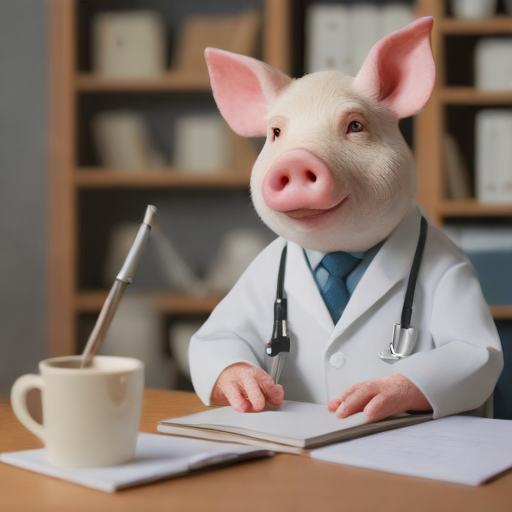

  0%|          | 0/2 [00:00<?, ?it/s]

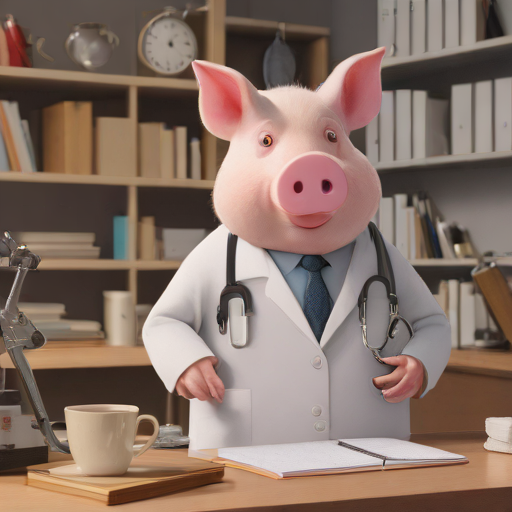

In [6]:
prompt="A pink pig,large snout,floppy ears,scientist,White lab coat,Black stethoscope,wooden desk,well-equipped laboratory,pen in mouth,The desk is organized with a coffee cup,filled with the coffee,clipboard,research notes,background filled with shelves and laboratory equipment,exploration,discovery,natural lighting,casting realistic shadows and highlights"
w=h=512
for _ in range(2):
  image = pipe(prompt=prompt,num_inference_steps=2,guidance_scale=0.0,width=w,height=h).images[0]
  image.save(f"outputs/image_{int(time.time())}_{random.randint(0,999999)}.png")
  display(image)